In [1]:
from sklearn.model_selection import train_test_split

from data_utils import create_directory_structure, identify_duplicates
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import matplotlib.pyplot as plt
import itertools

In [2]:
image_dir = 'D:/Nam4/KLTN/Dataset/HAM10000_images'
metadata_csv = 'D:/Nam4/KLTN/Dataset/HAM10000_metadata.csv'

df_data = pd.read_csv(metadata_csv)
train_dir, val_dir = create_directory_structure()


In [3]:
identify_duplicates(df_data)

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,yes
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,yes
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,yes
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,yes
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,yes
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,yes
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,yes
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,yes
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,yes


In [7]:
df_data['duplicates'].value_counts()

duplicates
no     5514
yes    4501
Name: count, dtype: int64

In [8]:
df = df_data[df_data['duplicates'] == 'no']

df.shape

(5514, 8)

In [9]:
#Tạo một tập hợp val bằng df vì đảm bảo rằng không có hình ảnh nào trong số này 
# có augmented duplicates trong  train set
y = df['dx']    

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(938, 8)

In [10]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

In [11]:
# Tập dữ liệu df_train sẽ là df_data loại bỏ hết các dòng có trong tập val

# Hàm xác định một ảnh thuộc tập train hay tập val
def identify_val_rows(x):
    # Tạo danh sách tất cả image_id trong tập validation
    val_list = list(df_val['image_id'])
    
    # Nếu image_id có trong danh sách val_list, gán là 'val'
    if str(x) in val_list:
        return 'val'
    else:
        # Ngược lại gán là 'train'
        return 'train'

# Xác định ảnh nào thuộc train và val

# Tạo một cột mới 'train_or_val', sao chép từ cột 'image_id'
df_data['train_or_val'] = df_data['image_id']

# Áp dụng hàm identify_val_rows để gán nhãn 'train' hoặc 'val' cho từng dòng
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)

# Lọc ra các dòng thuộc tập train
df_train = df_data[df_data['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))


9077
938


In [12]:
df_train['dx'].value_counts()

dx
nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: count, dtype: int64

In [13]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

### Transfer the Images into the Folders

In [11]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [12]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('D:/Nam4/KLTN/Dataset/ham10000_images_part_1')
folder_2 = os.listdir('D:/Nam4/KLTN/Dataset/ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

In [12]:
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
6020
6020
5858
5217
5290
4410


In [13]:
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


### Copy the train images  into aug_dir

In [14]:
# Lưu ý rằng chúng ta không tăng cường dữ liệu cho lớp 'nv'
class_list = ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

for item in class_list:
    
    # Tạo các thư mục tạm thời vì chúng ta sẽ xóa chúng sau này
    # Tạo thư mục gốc tạm thời
    aug_dir = 'aug_dir'
    os.makedirs(aug_dir, exist_ok=True)
    # Tạo thư mục con để lưu các ảnh của cùng một lớp
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.makedirs(img_dir, exist_ok=True)

    # Chọn một lớp (ví dụ: 'mel', 'bkl', ...)
    img_class = item

    # Liệt kê tất cả ảnh trong thư mục train của lớp đó
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Sao chép ảnh từ thư mục train của lớp vào img_dir tạm thời
    for fname in img_list:
        # Đường dẫn nguồn tới ảnh
        src = os.path.join('base_dir/train_dir/' + img_class, fname)
        # Đường dẫn đích tới ảnh
        dst = os.path.join(img_dir, fname)
        # Sao chép ảnh từ nguồn tới đích
        shutil.copyfile(src, dst)

    # Trỏ tới thư mục chứa ảnh (không trỏ trực tiếp tới ảnh)
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Tạo một generator để sinh ảnh tăng cường
    datagen = ImageDataGenerator(
        rotation_range=180,        # Xoay ngẫu nhiên trong khoảng 0-180 độ
        width_shift_range=0.1,     # Dịch ngang tối đa 10% chiều rộng
        height_shift_range=0.1,    # Dịch dọc tối đa 10% chiều cao
        zoom_range=0.1,            # Phóng to/thu nhỏ tối đa 10%
        horizontal_flip=True,      # Lật ngang ngẫu nhiên
        vertical_flip=True,        # Lật dọc ngẫu nhiên
        fill_mode='nearest'        # Điền khoảng trống bằng giá trị gần nhất
    )

    batch_size = 50

    # Tạo một generator từ thư mục ảnh
    aug_datagen = datagen.flow_from_directory(
        path,
        save_to_dir=save_path,    # Lưu ảnh tăng cường vào thư mục của lớp tương ứng
        save_format='jpg',
        target_size=(224, 224),   # Resize ảnh về kích thước 224x224
        batch_size=batch_size
    )

    # Xác định số lượng ảnh tăng cường mong muốn
    num_aug_images_wanted = 6000  # Tổng số lượng ảnh mong muốn cho mỗi lớp

    # Số lượng ảnh hiện có trong lớp đó
    num_files = len(os.listdir(img_dir))
    # Tính số batch cần sinh ra để đạt đủ số lượng ảnh mong muốn
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # Chạy generator để tạo thêm ảnh tăng cường cho đến khi đủ ~6000 ảnh
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # Xóa thư mục tạm chứa ảnh gốc sau khi tăng cường xong
    shutil.rmtree('aug_dir')


Found 5920 images belonging to 1 classes.
Found 5920 images belonging to 1 classes.


KeyboardInterrupt: 

In [14]:

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
6020
6020
5858
5217
5290
4410


In [15]:
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


In [16]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
# Example: Displaying images from the augmented directory
plots(imgs, titles=None)  # titles=labels will display the image labels

NameError: name 'imgs' is not defined

### Build model

In [16]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = int(np.ceil(num_train_samples / train_batch_size))
val_steps = int(np.ceil(num_val_samples / val_batch_size))


In [17]:
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [18]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,
                                            class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,
                                            class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)


# Chuyển đổi train_batches thành tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_signature=(
        tf.TensorSpec(shape=(None, image_size, image_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)  # 7 là số lớp
    )
)

# Chuyển đổi valid_batches thành tf.data.Dataset
valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_batches,
    output_signature=(
        tf.TensorSpec(shape=(None, image_size, image_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)
    )
)

Found 38769 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [19]:
for images, labels in train_batches:
    print("Type of images:", type(images))
    print("Type of labels:", type(labels))
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)
    break

Type of images: <class 'numpy.ndarray'>
Type of labels: <class 'numpy.ndarray'>
Shape of images: (10, 224, 224, 3)
Shape of labels: (10, 7)


In [21]:
def get_model():
    # Tao base model
    base_model = tf.keras.applications.mobilenet.MobileNet()
    
    # Lay cac layer cuoi cung cua base model
    x = base_model.layers[-6].output

    # Lam giam kich thuoc cua x
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Dropout layer
    x = Dropout(0.25)(x)    

    # Dense layer voi activation la softmax
    predictions = Dense(7, activation='softmax')(x)

    # Dong bang cac layer cua base model
    for layer in base_model.layers[:-23]:
        layer.trainable = False

    # Tao model chinh
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [22]:
model = get_model()

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

### Train the Model

In [24]:
# Define Top2 va top3 accuracy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [25]:
model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])


In [26]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [ ]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 5.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 2.0, # vasc
}

In [28]:
for images, labels in train_batches:
    print("Image shape:", images.shape)  # Dạng (batch_size, height, width, channels)
    print("Label shape:", labels.shape)  # Dạng (batch_size, num_classes)
    break

Image shape: (10, 224, 224, 3)
Label shape: (10, 7)


In [46]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(
    train_dataset,
    steps_per_epoch=train_steps,
    validation_data=valid_dataset,
    validation_steps=val_steps,
    epochs=30,
    verbose=1,
    callbacks=callbacks_list,
    class_weight=class_weights
)

Epoch 1/30


908/908 [==============================] - ETA: 0s - loss: 1.6956 - categorical_accuracy: 0.5292 - top_2_accuracy: 0.7265 - top_3_accuracy: 0.8489
Epoch 1: val_top_3_accuracy improved from -inf to 0.89659, saving model to model.h5


d:\SOFTWARE\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


908/908 [==============================] - 175s 188ms/step - loss: 1.6956 - categorical_accuracy: 0.5292 - top_2_accuracy: 0.7265 - top_3_accuracy: 0.8489 - val_loss: 1.8654 - val_categorical_accuracy: 0.5896 - val_top_2_accuracy: 0.7932 - val_top_3_accuracy: 0.8966 - lr: 0.0100
Epoch 2/30
908/908 [==============================] - ETA: 0s - loss: 1.1934 - categorical_accuracy: 0.6381 - top_2_accuracy: 0.8268 - top_3_accuracy: 0.9189
Epoch 2: val_top_3_accuracy did not improve from 0.89659
908/908 [==============================] - 115s 126ms/step - loss: 1.1934 - categorical_accuracy: 0.6381 - top_2_accuracy: 0.8268 - top_3_accuracy: 0.9189 - val_loss: 2.0459 - val_categorical_accuracy: 0.4051 - val_top_2_accuracy: 0.5544 - val_top_3_accuracy: 0.6759 - lr: 0.0100
Epoch 3/30
908/908 [==============================] - ETA: 0s - loss: 1.0673 - categorical_accuracy: 0.6724 - top_2_accuracy: 0.8531 - top_3_accuracy: 0.9406
Epoch 3: val_top_3_accuracy improved from 0.89659 to 0.96482, savin

In [29]:
from tensorflow.keras.models import load_model

model = load_model('model.h5', custom_objects={'top_2_accuracy': top_2_accuracy,'top_3_accuracy': top_3_accuracy})

In [30]:
model.metrics_names

['loss', 'categorical_accuracy', 'top_2_accuracy', 'top_3_accuracy']

In [32]:
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

938/938 [==============================] - 18s 20ms/step - loss: 0.3509 - categorical_accuracy: 0.8998 - top_2_accuracy: 0.9627 - top_3_accuracy: 0.9872
val_loss: 0.3509465456008911
val_cat_acc: 0.8997867703437805
val_top_2_acc: 0.9626865386962891
val_top_3_acc: 0.9872068166732788


In [35]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

NameError: name 'history' is not defined

In [33]:
test_labels = test_batches.classes

In [34]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [35]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [36]:
predictions = model.predict(test_batches, steps=len(df_val), verbose=1)

938/938 [==============================] - 19s 20ms/step


In [37]:
predictions.shape

(938, 7)

In [33]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [34]:
test_labels.shape

(938,)

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import matplotlib.pyplot as plt

In [36]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [37]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[ 15   2   3   0   4   2   0]
 [  1  24   2   0   3   0   0]
 [  3   0  49   0  12  11   0]
 [  0   0   0   4   0   2   0]
 [  0   0   4   0  26   9   0]
 [  5   4   5   1  17 717   2]
 [  0   0   0   0   0   1  10]]


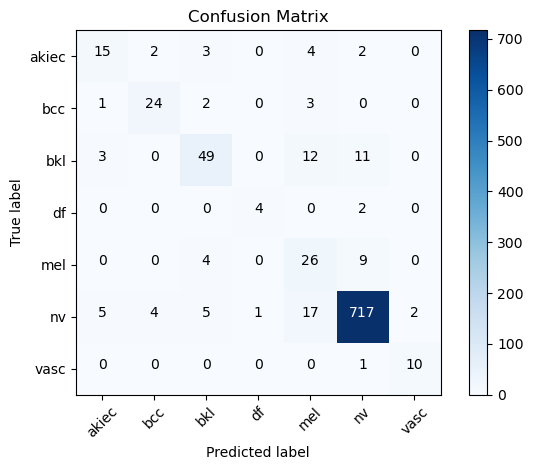

In [38]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#### Ứng dụng Inductive Conformal Prediction

In [38]:
def data_generator(dataset):
    iterator = iter(dataset)
    
    while True:
        try:
            batch = next(iterator)
            yield batch[0], batch[1] 
        except StopIteration:
            break

In [39]:
# Lấy 20% ảnh từ train_dataset để calibration
calib_images = 8400  # 42000 * 0.2 = 8400

X_cal, y_cal = [], []
for X_batch, y_batch in data_generator(train_dataset):
    X_cal.extend(X_batch)
    y_cal.extend(y_batch)
    if len(X_cal) >= calib_images:
        break

X_cal = np.array(X_cal[:calib_images])
y_cal = np.array(y_cal[:calib_images])

In [ ]:
import importlib
import conformal_utils
importlib.reload(conformal_utils)

In [40]:
from conformal_utils import InductiveConformalPredictor
icp = InductiveConformalPredictor(model, batch_size=64)
print("Fitting conformal predictor...")
icp.fit(X_cal, y_cal)

Fitting conformal predictor...


In [41]:
np.savez("icp_data.npz",
         scores=icp.nc_scorer.nc_scores,
         threshold=icp.nc_scorer.threshold,
         n_classes=icp.n_classes)

In [42]:
def evaluate_icp_batch(prediction_sets, y_true, n_classes):
    
    # Tạo mask xem true label có trong prediction set không
    coverage_hits = np.array([true_label in pred_set for pred_set, true_label in zip(prediction_sets, y_true)])
    coverage_sum = np.sum(coverage_hits)
    
    # Tính kích thước tập dự đoán
    set_sizes = np.array([len(pset) for pset in prediction_sets])
    size_sum = np.sum(set_sizes)
    
    return {
        'coverage_sum': coverage_sum,
        'size_sum': size_sum,
        'count': len(y_true)
    }


In [ ]:
significance = 0.1
n_classes = y_cal.shape[1]  # Số lượng lớp (7)

print("Dự đoán prediction sets bằng ICP theo batch...")

# Khởi tạo biến tích lũy cho việc đánh giá
total_results = {
    'coverage_sum': 0,
    'size_sum': 0,
    'count': 0
}

# Theo dõi tiến độ
max_batches = 2000  # Giới hạn số lượng batch để đánh giá
current_batch = 0

# Xử lý từng batch một với giới hạn số lượng
for X_batch, y_batch in data_generator(test_batches):
    # Chuyển y_batch từ one-hot sang indices
    y_indices = np.argmax(y_batch, axis=1)
    
    # Dự đoán cho batch hiện tại
    prediction_sets = icp.predict_batch(X_batch, significance)    
    # Tích lũy kết quả đánh giá
    batch_results = evaluate_icp_batch(prediction_sets, y_indices, n_classes)
    
    # Cập nhật tổng kết quả
    total_results['coverage_sum'] += batch_results['coverage_sum']
    total_results['size_sum'] += batch_results['size_sum']
    total_results['count'] += batch_results['count']
     
    # In tiến độ
    current_batch += 1
    if current_batch % 10 == 0:
        print(f"Đã xử lý {current_batch} batches, đã đánh giá {total_results['count']} mẫu...")
    
    # Thoát sớm nếu đã đủ số lượng batch
    if current_batch >= max_batches:
        print(f"Đã đạt tới giới hạn {max_batches} batches, dừng đánh giá...")
        break



Dự đoán prediction sets bằng ICP theo batch...
Đã xử lý 10 batches, đã đánh giá 10 mẫu...
Đã xử lý 20 batches, đã đánh giá 20 mẫu...
Đã xử lý 30 batches, đã đánh giá 30 mẫu...
Đã xử lý 40 batches, đã đánh giá 40 mẫu...
Đã xử lý 50 batches, đã đánh giá 50 mẫu...
Đã xử lý 60 batches, đã đánh giá 60 mẫu...
Đã xử lý 70 batches, đã đánh giá 70 mẫu...
Đã xử lý 80 batches, đã đánh giá 80 mẫu...
Đã xử lý 90 batches, đã đánh giá 90 mẫu...
Đã xử lý 100 batches, đã đánh giá 100 mẫu...
Đã xử lý 110 batches, đã đánh giá 110 mẫu...
Đã xử lý 120 batches, đã đánh giá 120 mẫu...
Đã xử lý 130 batches, đã đánh giá 130 mẫu...
Đã xử lý 140 batches, đã đánh giá 140 mẫu...
Đã xử lý 150 batches, đã đánh giá 150 mẫu...
Đã xử lý 160 batches, đã đánh giá 160 mẫu...
Đã xử lý 170 batches, đã đánh giá 170 mẫu...
Đã xử lý 180 batches, đã đánh giá 180 mẫu...
Đã xử lý 190 batches, đã đánh giá 190 mẫu...
Đã xử lý 200 batches, đã đánh giá 200 mẫu...
Đã xử lý 210 batches, đã đánh giá 210 mẫu...
Đã xử lý 220 batches, đã đ

In [44]:
# Tính toán kết quả cuối cùng

coverage = total_results['coverage_sum'] / total_results['count']
avg_set_size = total_results['size_sum'] / total_results['count']
efficiency = 1 - avg_set_size / n_classes
error_rate = 1 - coverage


# In kết quả đánh giá
print("\nKết quả đánh giá:")
print(f"Coverage: {coverage:.3f}")
print(f"Average Set Size: {avg_set_size:.2f}")
print(f"Efficiency: {efficiency:.3f}")
print(f"Error Rate: {error_rate:.3f}")
print(f"Target Significance: {significance:.3f}")


Kết quả đánh giá:
Coverage: 0.924
Average Set Size: 1.13
Efficiency: 0.838
Error Rate: 0.076
Target Significance: 0.050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79607844..1.0].


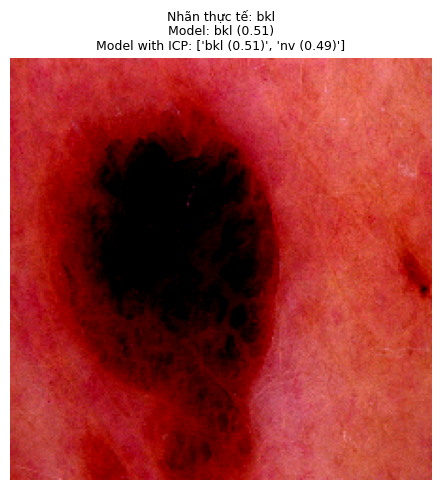

In [48]:
import matplotlib.pyplot as plt

# Lấy một batch từ test set
X_batch, y_batch = next(data_generator(test_batches))
y_true = np.argmax(y_batch, axis=1)

# Dự đoán bằng ICP
significance = 0.05
prediction_sets = icp.predict_batch(X_batch, significance)

# Dự đoán top-1 bằng mô hình gốc
probs = model.predict(X_batch, verbose=0)
top1_preds = np.argmax(probs, axis=1)

# Nhãn lớp
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Hiển thị một ảnh duy nhất
i = 0  # chỉ số ảnh trong batch
plt.figure(figsize=(5, 5))
plt.imshow(X_batch[i])
plt.axis('off')

true_label = class_labels[y_true[i]]
top1_label = class_labels[top1_preds[i]]
icp_pred_info = [f"{class_labels[j]} ({probs[i][j]:.2f})" for j in prediction_sets[i]]

plt.title(
    f"Nhãn thực tế: {true_label}\n"
    f"Model: {top1_label} ({probs[i][top1_preds[i]]:.2f})\n"
    f"Model with ICP: {icp_pred_info}",
    fontsize=9
)

plt.tight_layout()
plt.show()
